# Final Project Submission

Please fill out:
* Student name: Acusio Bivona
* Student pace: self paced / part time / full time: Part Time
* Scheduled project review date/time: December 7th, 2019
* Instructor name: James Irving, Jeff Herman
* Blog post URL:
* Video of 5-min Non-Technical Presentation:


In this project, we are analyzing the data to answer a very simple, yet critical question in the world of real estate - as a home developer, what factors are going to provide the property you're building with maximal value, so that it may sell for its highest price?

# Obtaining & displaying our data. This is cells 1-5

In [1]:
!pip install -U fsds_100719
from fsds_100719.imports import *

fsds_1007219  v0.4.45 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


In [2]:
pd.set_option('display.max_columns',0)

In [3]:
csv="https://raw.githubusercontent.com/learn-co-students/dsc-v2-mod1-final-project-online-ds-pt-100719/master/kc_house_data.csv"
df = pd.read_csv(csv)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [5]:
df.describe().round(3)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19221.000,21534.000,21597.000,21597.000,21597.000,21597.000,17755.000,21597.000,21597.000,21597.000,21597.00,21597.000
mean,4.580474e+09,540296.574,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,1788.597,1971.000,83.637,98077.952,47.560,-122.214,1986.62,12758.284
std,2.876736e+09,367368.140,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,827.760,29.375,399.946,53.513,0.139,0.141,685.23,27274.442
min,1.000102e+06,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,1900.000,0.000,98001.000,47.156,-122.519,399.00,651.000
25%,2.123049e+09,322000.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,1951.000,0.000,98033.000,47.471,-122.328,1490.00,5100.000
50%,3.904930e+09,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,1975.000,0.000,98065.000,47.572,-122.231,1840.00,7620.000
75%,7.308900e+09,645000.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,2210.000,1997.000,0.000,98118.000,47.678,-122.125,2360.00,10083.000
max,9.900000e+09,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.00,871200.000


# Drop the unnecessary columns, "ID" and "Date"

In [6]:
df.drop(['id','date'],axis=1,inplace=True)

# Confirm columns were dropped

Along with this, the columns "View", "Waterfront", and "Yr_Renovated" have null values.

"Sqft_Basement" also needs to be cleaned because it contains numerical data but is listed as an object datatype

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(10), object(1)
memory usage: 3.1+ MB


# Cells 8-12 fill null values for "View"

In [8]:
df['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [9]:
df['view'].median()

0.0

In [10]:
df['view'].mean()

0.23386272870808952

In [11]:
df['view'].fillna(df['view'].median(), inplace=True)

In [12]:
df['view'].isna().sum()

0

# Confirm null values for "View" have been handled

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(10), object(1)
memory usage: 3.1+ MB


# Cells 14-18 fill null values for "Waterfront"

In [14]:
df['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [15]:
df['waterfront'].mean()

0.007595858696217679

In [16]:
df['waterfront'].median()

0.0

In [17]:
df['waterfront'].fillna(df['waterfront'].median(), inplace=True)

In [18]:
df['waterfront'].isna().sum()

0

# Confirm null values for "Waterfront" have been handled

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(10), object(1)
memory usage: 3.1+ MB


# Change "Yr_Renovated" to "Is_Renovated"

95.8% of the data entries in "Yr_Renovated" show that the property has never been renovated. Thus, changing this column to represent whether a home has been renovated or not - no matter the year - gives the data greater value.

Also, since a resounding majority of the data shows that the properties have not been renovated (again, 95.8% of original entries), it is safe to fill the null values with 0, representing that they have not been renovated.

In [20]:
df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [21]:
df['is_renovated'] = np.where(df['yr_renovated'] == 0, 0, 1)

# Drop the original "Yr_Renovated" column and confirm that the new column, "Is_Renovated", has been inserted into the Dataframe

In [23]:
df.drop(['yr_renovated'],axis=1,inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
is_renovated     21597 non-null int64
dtypes: float64(8), int64(11), object(1)
memory usage: 3.3+ MB


# Investigate and clean "Sqft_Basement"

In [ ]:
df['sqft_basement'].value_counts()

In [24]:
df['sqft_basement'] = df['sqft_basement'].replace(to_replace='?', value='0.0')

In [25]:
df['sqft_basement'].value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
946.0         1
1275.0        1
1880.0        1
2250.0        1
792.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [26]:
df["sqft_basement"] = df["sqft_basement"].astype(float)

# Confirm "Sqft_Basement" has been handled

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
is_renovated     21597 non-null int64
dtypes: float64(8), int64(11)
memory usage: 3.1 MB


# Outlier Removal - Cells 28-32

In [28]:
def find_outliers(col):
    """Use scipy to calcualte absoliute Z-scores 
    and return boolean series where True indicates it is an outlier
    Args:
        col (Series): a series/column from your DataFrame
    Returns:
        idx_outliers (Series): series of  True/False for each row in col
        
    Ex:
    >> idx_outs = find_outliers(df['bedrooms'])
    >> df_clean = df.loc[idx_outs==False]"""
    from scipy import stats
    z = np.abs(stats.zscore(col))
    idx_outliers = np.where(z>3,True,False)
    return pd.Series(idx_outliers,index=col.index)

In [29]:
df_test = pd.DataFrame()
for col in df.drop('zipcode', axis=1).columns:
    idx = find_outliers(df[col])
    df_test[col] = idx

In [30]:
idx_all_outliers = df_test.any(axis=1)
df_clean = df[idx_all_outliers==False]
df_clean.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,is_renovated
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639,1
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062,1
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000,0
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503,0


In [31]:
df_clean.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,is_renovated
count,1.942500e+04,19425.000000,19425.000000,19425.000000,19425.000000,19425.000000,19425.0,19425.000000,19425.000000,19425.000000,19425.000000,19425.000000,19425.000000,19425.000000,19425.000000,19425.000000,19425.000000,19425.000000,19425.000000
mean,4.854289e+05,3.325097,2.042368,1953.524479,9835.552227,1.481236,0.0,0.094826,3.414826,7.534157,1694.627902,253.467799,1970.583218,98079.080051,47.561120,-122.222451,1905.973951,9072.826718,0.208597
std,2.353581e+05,0.851639,0.690797,739.456329,11485.821758,0.538466,0.0,0.407364,0.644459,1.023649,705.909533,386.870743,29.440798,53.420152,0.139747,0.128498,597.011404,8990.714999,0.406316
min,8.200000e+04,1.000000,0.500000,370.000000,520.000000,1.000000,0.0,0.000000,2.000000,5.000000,370.000000,0.000000,1900.000000,98001.000000,47.176400,-122.502000,460.000000,651.000000,0.000000
25%,3.149500e+05,3.000000,1.500000,1400.000000,5000.000000,1.000000,0.0,0.000000,3.000000,7.000000,1170.000000,0.000000,1951.000000,98033.000000,47.470200,-122.331000,1460.000000,5000.000000,0.000000
50%,4.350000e+05,3.000000,2.000000,1840.000000,7350.000000,1.000000,0.0,0.000000,3.000000,7.000000,1510.000000,0.000000,1974.000000,98072.000000,47.573200,-122.241000,1790.000000,7421.000000,0.000000
75%,6.010000e+05,4.000000,2.500000,2410.000000,9897.000000,2.000000,0.0,0.000000,4.000000,8.000000,2100.000000,500.000000,1996.000000,98118.000000,47.680700,-122.136000,2260.000000,9600.000000,0.000000
max,1.640000e+06,6.000000,4.250000,4750.000000,137214.000000,3.000000,0.0,2.000000,5.000000,11.000000,4270.000000,1600.000000,2015.000000,98199.000000,47.777600,-121.797000,4040.000000,93825.000000,1.000000


In [32]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19425 entries, 0 to 21596
Data columns (total 19 columns):
price            19425 non-null float64
bedrooms         19425 non-null int64
bathrooms        19425 non-null float64
sqft_living      19425 non-null int64
sqft_lot         19425 non-null int64
floors           19425 non-null float64
waterfront       19425 non-null float64
view             19425 non-null float64
condition        19425 non-null int64
grade            19425 non-null int64
sqft_above       19425 non-null int64
sqft_basement    19425 non-null float64
yr_built         19425 non-null int64
zipcode          19425 non-null int64
lat              19425 non-null float64
long             19425 non-null float64
sqft_living15    19425 non-null int64
sqft_lot15       19425 non-null int64
is_renovated     19425 non-null int64
dtypes: float64(8), int64(11)
memory usage: 3.0 MB


# Create Heatmap

Purpose 1: Check for multicollinearity and remove needed variables, if any

Purpose 2: Observe correlation with "Price" to determine feature selection when running the model

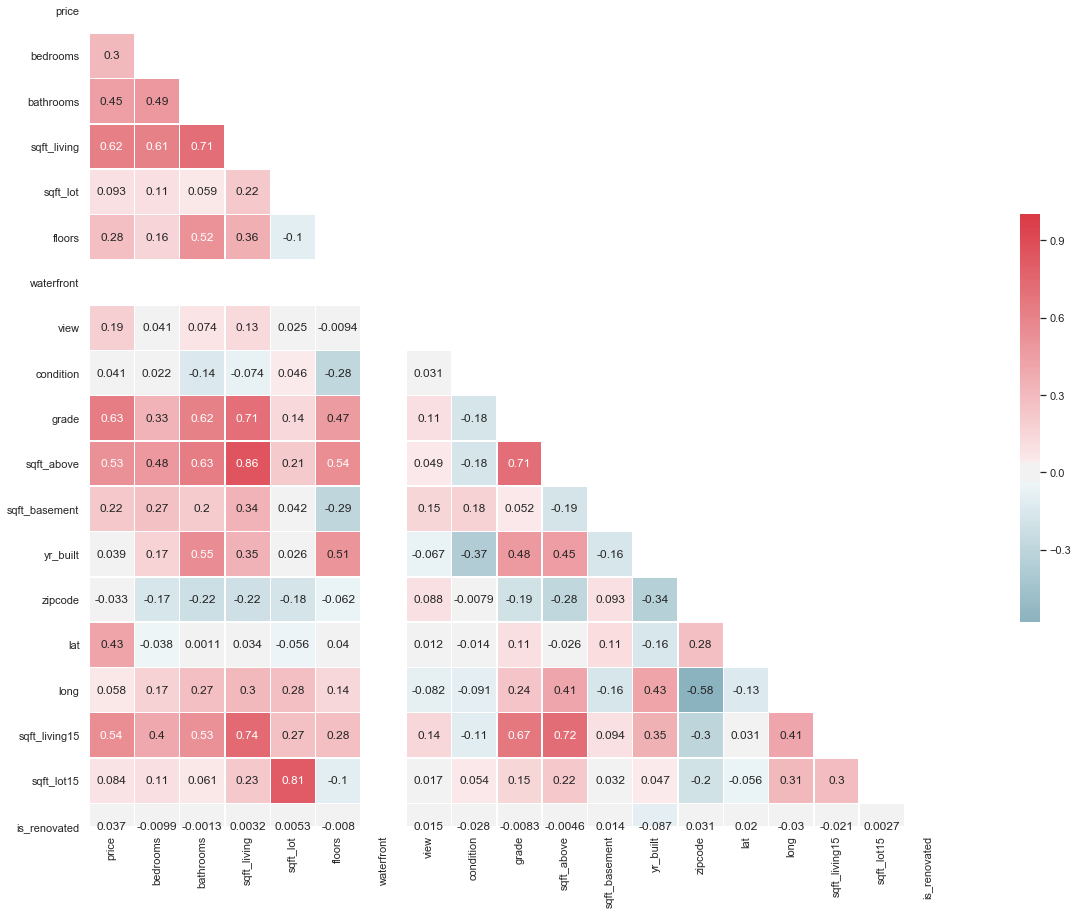

In [33]:
sns.set(style="white")
#Correlations are low - good thing?


# Compute the correlation matrix
corr = df_clean.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

# No results appeared for "Waterfront" and "Is_Renovated" - Drop them

In [34]:
df_clean.drop(['waterfront'],axis=1,inplace=True)

/Users/acusiobivona/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [35]:
df_clean.drop(['is_renovated'],axis=1,inplace=True)

# Confirm dropping of columns

In [36]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19425 entries, 0 to 21596
Data columns (total 17 columns):
price            19425 non-null float64
bedrooms         19425 non-null int64
bathrooms        19425 non-null float64
sqft_living      19425 non-null int64
sqft_lot         19425 non-null int64
floors           19425 non-null float64
view             19425 non-null float64
condition        19425 non-null int64
grade            19425 non-null int64
sqft_above       19425 non-null int64
sqft_basement    19425 non-null float64
yr_built         19425 non-null int64
zipcode          19425 non-null int64
lat              19425 non-null float64
long             19425 non-null float64
sqft_living15    19425 non-null int64
sqft_lot15       19425 non-null int64
dtypes: float64(7), int64(10)
memory usage: 2.7 MB


# Drop "Sqft_Above" and "Sqft_Lot15" to fix multicollinearity issues

In [37]:
df_clean.drop(['sqft_above'],axis=1,inplace=True)

In [38]:
df_clean.drop(['sqft_lot15'],axis=1,inplace=True)

In [39]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19425 entries, 0 to 21596
Data columns (total 15 columns):
price            19425 non-null float64
bedrooms         19425 non-null int64
bathrooms        19425 non-null float64
sqft_living      19425 non-null int64
sqft_lot         19425 non-null int64
floors           19425 non-null float64
view             19425 non-null float64
condition        19425 non-null int64
grade            19425 non-null int64
sqft_basement    19425 non-null float64
yr_built         19425 non-null int64
zipcode          19425 non-null int64
lat              19425 non-null float64
long             19425 non-null float64
sqft_living15    19425 non-null int64
dtypes: float64(7), int64(8)
memory usage: 2.4 MB


# *Feature Selection: Grade, Sqft_Living, Sqft_Living15*

# Create scatter plot to check for linearity

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


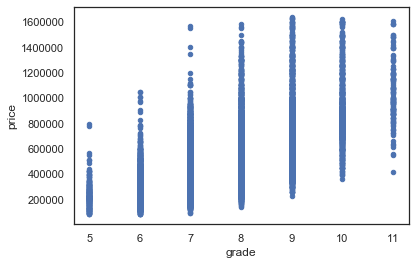

In [40]:
df_clean.plot("grade","price", kind='scatter')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


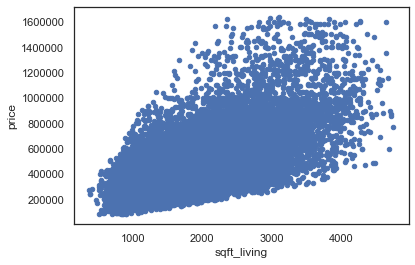

In [41]:
df_clean.plot("sqft_living","price", kind='scatter')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


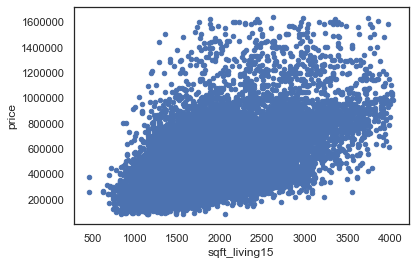

In [42]:
df_clean.plot("sqft_living15","price", kind='scatter')

# Create qq plots for target variables and obtain diagnostic stats

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                 1.299e+04
Date:                Fri, 06 Dec 2019   Prob (F-statistic):               0.00
Time:                        17:20:20   Log-Likelihood:            -2.6285e+05
No. Observations:               19425   AIC:                         5.257e+05
Df Residuals:                   19423   BIC:                         5.257e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.112e+05   9710.200    -62.942      0.000    -6.3e+05   -5.92e+05
grade       1.456e+05   1277.091    113.972      0.000    1.43e+05    1.48e+05
==============================================================================
Omnibus:                     3932.649   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9557.717
Skew:                           1.128   Prob(JB):                         0.00
Kurtosis:                       5.592   Cond. No.                         57.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

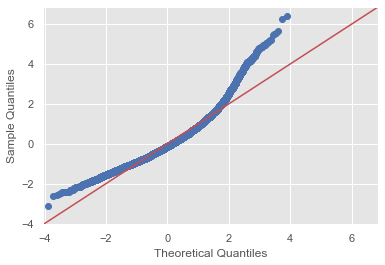

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                 1.224e+04
Date:                Fri, 06 Dec 2019   Prob (F-statistic):               0.00
Time:                        17:20:20   Log-Likelihood:            -2.6308e+05
No. Observations:               19425   AIC:                         5.262e+05
Df Residuals:                   19423   BIC:                         5.262e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    9.887e+04   3736.433     26.461      0.000    9.15e+04    1.06e+05
sqft_living   197.8770      1.789    110.620      0.000     194.371     201.383
==============================================================================
Omnibus:                     3403.470   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7601.632
Skew:                           1.017   Prob(JB):                         0.00
Kurtosis:                       5.293   Cond. No.                     5.90e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

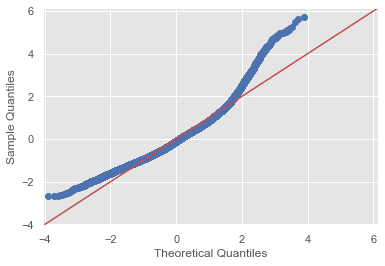

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     8061.
Date:                Fri, 06 Dec 2019   Prob (F-statistic):               0.00
Time:                        17:20:21   Log-Likelihood:            -2.6446e+05
No. Observations:               19425   AIC:                         5.289e+05
Df Residuals:                   19423   BIC:                         5.289e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      7.851e+04   4749.509     16.529      0.000    6.92e+04    8.78e+04
sqft_living15   213.4987      2.378     89.781      0.000     208.838     218.160
==============================================================================
Omnibus:                     4839.008   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13740.464
Skew:                           1.312   Prob(JB):                         0.00
Kurtosis:                       6.177   Cond. No.                     6.68e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

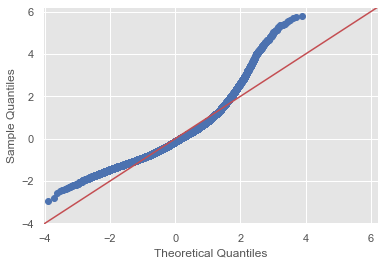

In [43]:
#Initial qq plots
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
plt.style.use('ggplot')

f = 'price~grade'
f2 = 'price~sqft_living'
f3 = 'price~sqft_living15'

model = smf.ols(formula=f, data=df_clean).fit()
model2 = smf.ols(formula=f2, data=df_clean).fit()
model3 = smf.ols(formula=f3, data=df_clean).fit()

resid1 = model.resid
resid2 = model2.resid
resid3 = model3.resid

display(model.summary())

fig = sm.graphics.qqplot(resid1, dist=stats.norm, line='45', fit=True)
plt.show()
display(model2.summary())
fig2 = sm.graphics.qqplot(resid2, dist=stats.norm, line='45', fit=True)
plt.show()
fig3 = sm.graphics.qqplot(resid3, dist=stats.norm, line='45', fit=True)
display(model3.summary())
plt.show()

# Create and run initial model

In [44]:
from statsmodels.formula.api import ols

In [45]:
f = 'price~grade+sqft_living+sqft_living15'

In [46]:
model = ols(formula=f, data=df_clean).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     5581.
Date:                Fri, 06 Dec 2019   Prob (F-statistic):               0.00
Time:                        17:20:21   Log-Likelihood:            -2.6179e+05
No. Observations:               19425   AIC:                         5.236e+05
Df Residuals:                   19421   BIC:                         5.236e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.958e+05   1.03e+04    -38.601      0.000   -4.16e+05   -3.76e+05
grade           8.48e+04   1798.275     47.154      0.000    8.13e+04    8.83e+04
sqft_living     100.5309      2.739     36.697      0.000      95.161     105.900
sqft_living15    24.1182      3.234      7.457      0.000      17.779      30.457
==============================================================================
Omnibus:                     3595.518   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8496.750
Skew:                           1.047   Prob(JB):                         0.00
Kurtosis:                       5.472   Cond. No.                     2.41e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Initial Results

Based on the r2 score, only 46.3% of our results can be explained from the data. This is very low. Another model will have to be run, potentially with more variables in order to get a more trustworthy result.

Our y-intercept and our coefficent for grade are also very high, meaning that some logging and/or more data transformations should be completed in order to create higher quality variables to insert into the model.

# Create histograms for variables and log/scale as needed

However, we DON'T want to log transfrom "Price" because it is your y variable

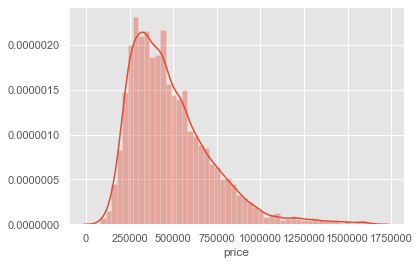

In [47]:
x = df_clean['price']
ax = sns.distplot(x)

/Users/acusiobivona/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


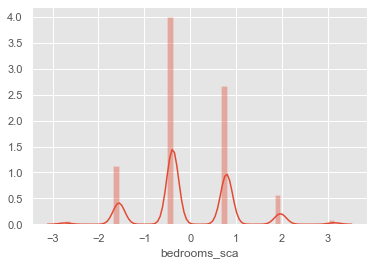

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
col_data = df_clean['bedrooms'].values.reshape(-1,1)
scale_data = scaler.fit_transform(col_data)
df_clean['bedrooms_sca'] = scale_data.flatten()

x = df_clean['bedrooms_sca']
ax = sns.distplot(x)

/Users/acusiobivona/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


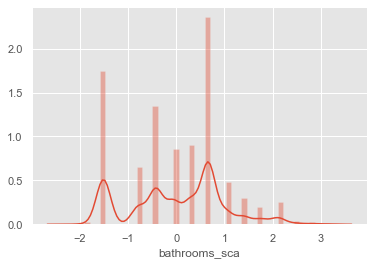

In [49]:
scaler = StandardScaler()
col_data = df_clean['bathrooms'].values.reshape(-1,1)
scale_data = scaler.fit_transform(col_data)
df_clean['bathrooms_sca'] = scale_data.flatten()

x = df_clean['bathrooms_sca']
ax = sns.distplot(x)

/Users/acusiobivona/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


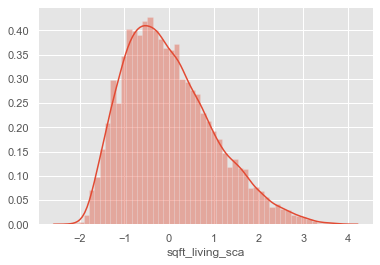

In [50]:
scaler = StandardScaler()
col_data = df_clean['sqft_living'].values.reshape(-1,1)
scale_data = scaler.fit_transform(col_data)
df_clean['sqft_living_sca'] = scale_data.flatten()

x = df_clean['sqft_living_sca']
ax = sns.distplot(x)

/Users/acusiobivona/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/acusiobivona/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


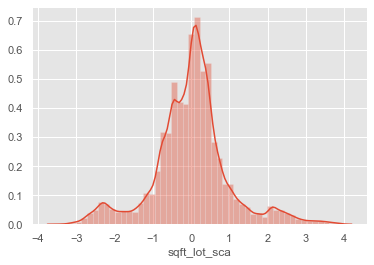

In [51]:
df_clean['sqft_lot'] = np.log(df_clean['sqft_lot'])

scaler = StandardScaler()
col_data = df_clean['sqft_lot'].values.reshape(-1,1)
scale_data = scaler.fit_transform(col_data)
df_clean['sqft_lot_sca'] = scale_data.flatten()

x = df_clean['sqft_lot_sca']
ax = sns.distplot(x)

/Users/acusiobivona/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


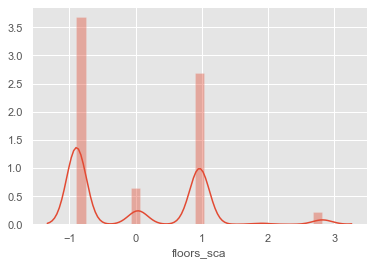

In [52]:
scaler = StandardScaler()
col_data = df_clean['floors'].values.reshape(-1,1)
scale_data = scaler.fit_transform(col_data)
df_clean['floors_sca'] = scale_data.flatten()

x = df_clean['floors_sca']
ax = sns.distplot(x)

/Users/acusiobivona/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


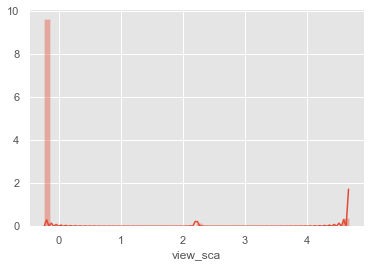

In [53]:
scaler = StandardScaler()
col_data = df_clean['view'].values.reshape(-1,1)
scale_data = scaler.fit_transform(col_data)
df_clean['view_sca'] = scale_data.flatten()

x = df_clean['view_sca']
ax = sns.distplot(x)

/Users/acusiobivona/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


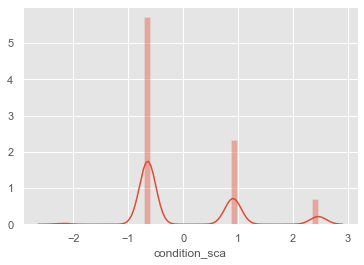

In [54]:
scaler = StandardScaler()
col_data = df_clean['condition'].values.reshape(-1,1)
scale_data = scaler.fit_transform(col_data)
df_clean['condition_sca'] = scale_data.flatten()

x = df_clean['condition_sca']
ax = sns.distplot(x)

/Users/acusiobivona/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


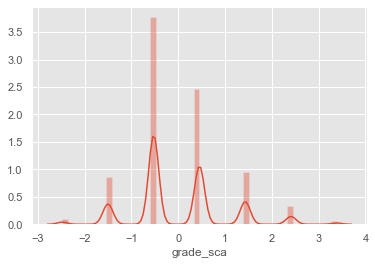

In [55]:
scaler = StandardScaler()
col_data = df_clean['grade'].values.reshape(-1,1)
scale_data = scaler.fit_transform(col_data)
df_clean['grade_sca'] = scale_data.flatten()

x = df_clean['grade_sca']
ax = sns.distplot(x)

/Users/acusiobivona/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


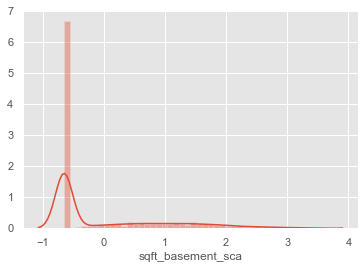

In [56]:
scaler = StandardScaler()
col_data = df_clean['sqft_basement'].values.reshape(-1,1)
scale_data = scaler.fit_transform(col_data)
df_clean['sqft_basement_sca'] = scale_data.flatten()

x = df_clean['sqft_basement_sca']
ax = sns.distplot(x)

/Users/acusiobivona/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


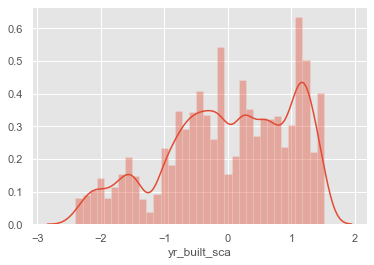

In [57]:
scaler = StandardScaler()
col_data = df_clean['yr_built'].values.reshape(-1,1)
scale_data = scaler.fit_transform(col_data)
df_clean['yr_built_sca'] = scale_data.flatten()

x = df_clean['yr_built_sca']
ax = sns.distplot(x)

/Users/acusiobivona/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


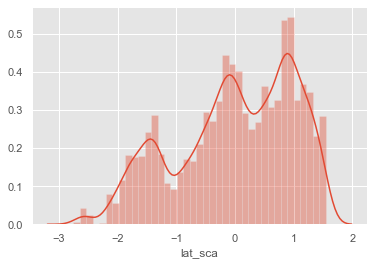

In [58]:
scaler = StandardScaler()
col_data = df_clean['lat'].values.reshape(-1,1)
scale_data = scaler.fit_transform(col_data)
df_clean['lat_sca'] = scale_data.flatten()

x = df_clean['lat_sca']
ax = sns.distplot(x)

/Users/acusiobivona/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


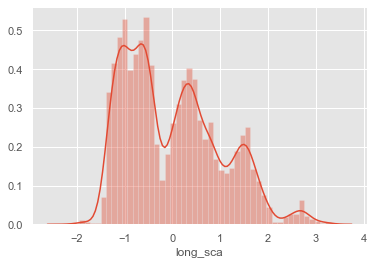

In [59]:
scaler = StandardScaler()
col_data = df_clean['long'].values.reshape(-1,1)
scale_data = scaler.fit_transform(col_data)
df_clean['long_sca'] = scale_data.flatten()

x = df_clean['long_sca']
ax = sns.distplot(x)

/Users/acusiobivona/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


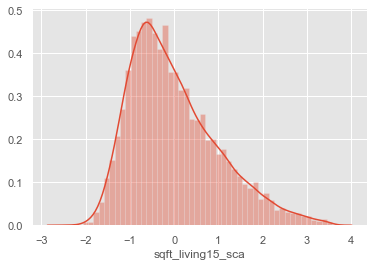

In [60]:
scaler = StandardScaler()
col_data = df_clean['sqft_living15'].values.reshape(-1,1)
scale_data = scaler.fit_transform(col_data)
df_clean['sqft_living15_sca'] = scale_data.flatten()

x = df_clean['sqft_living15_sca']
ax = sns.distplot(x)

# Create new heatmap that includes scaled variables - check again for multicollinearity

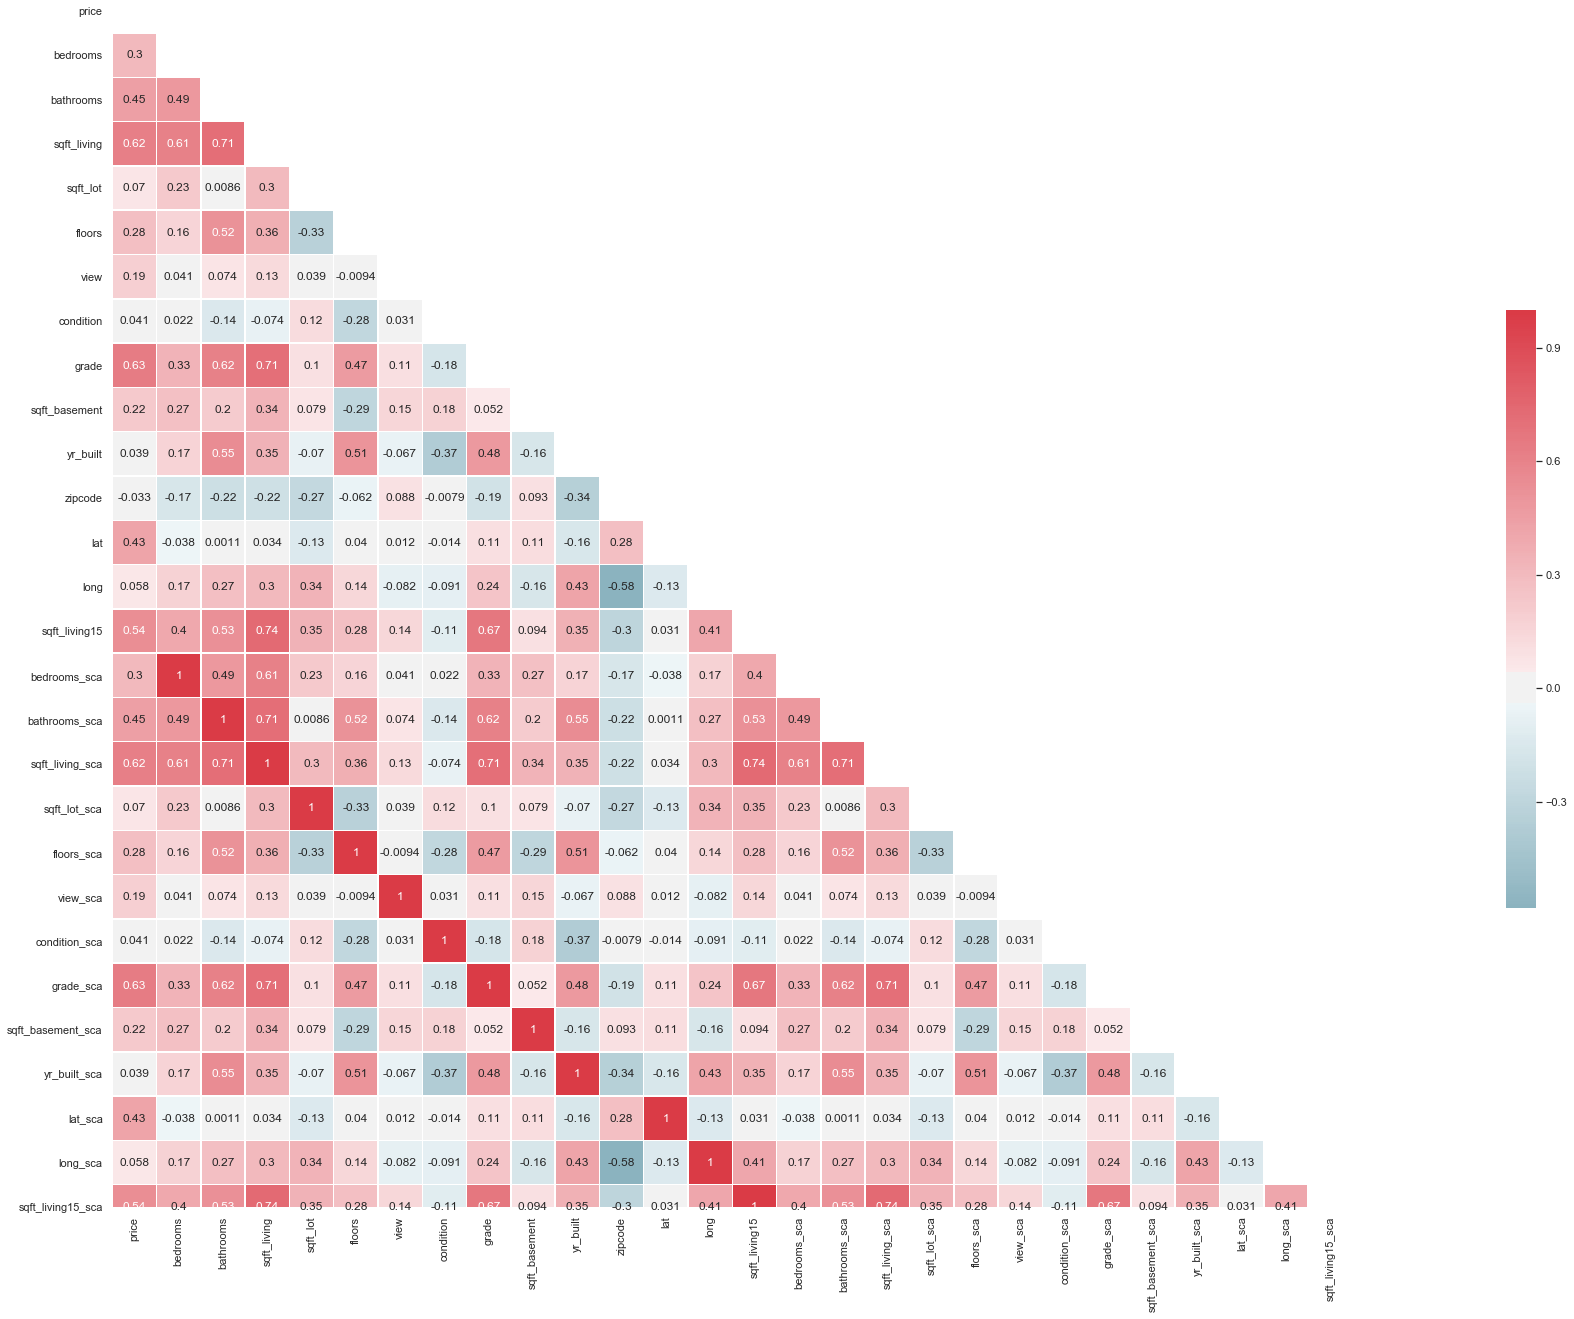

In [61]:
sns.set(style="white")
#Correlations are low - good thing?


# Compute the correlation matrix
corr = df_clean.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(55, 22))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

# Multicollineraity is only present with the original (non-scaled) variables and the new (scaled) variables. Drop original variables

In [62]:
df_clean.drop(['bedrooms'],axis=1,inplace=True)

/Users/acusiobivona/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [63]:
df_clean.drop(['bathrooms'],axis=1,inplace=True)

In [64]:
df_clean.drop(['sqft_living'],axis=1,inplace=True)

In [65]:
df_clean.drop(['sqft_lot'],axis=1,inplace=True)

In [66]:
df_clean.drop(['floors'],axis=1,inplace=True)

In [67]:
df_clean.drop(['view'],axis=1,inplace=True)

In [68]:
df_clean.drop(['condition'],axis=1,inplace=True)

In [69]:
df_clean.drop(['grade'],axis=1,inplace=True)

In [70]:
df_clean.drop(['sqft_basement'],axis=1,inplace=True)

In [71]:
df_clean.drop(['yr_built'],axis=1,inplace=True)

In [72]:
df_clean.drop(['lat'],axis=1,inplace=True)

In [73]:
df_clean.drop(['long'],axis=1,inplace=True)

In [74]:
df_clean.drop(['sqft_living15'],axis=1,inplace=True)

# Check and confirm original columns were dropped

In [75]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19425 entries, 0 to 21596
Data columns (total 15 columns):
price                19425 non-null float64
zipcode              19425 non-null int64
bedrooms_sca         19425 non-null float64
bathrooms_sca        19425 non-null float64
sqft_living_sca      19425 non-null float64
sqft_lot_sca         19425 non-null float64
floors_sca           19425 non-null float64
view_sca             19425 non-null float64
condition_sca        19425 non-null float64
grade_sca            19425 non-null float64
sqft_basement_sca    19425 non-null float64
yr_built_sca         19425 non-null float64
lat_sca              19425 non-null float64
long_sca             19425 non-null float64
sqft_living15_sca    19425 non-null float64
dtypes: float64(14), int64(1)
memory usage: 2.4 MB


# Create another heatmap in order to confirm no multicolinnearity with scaled variables

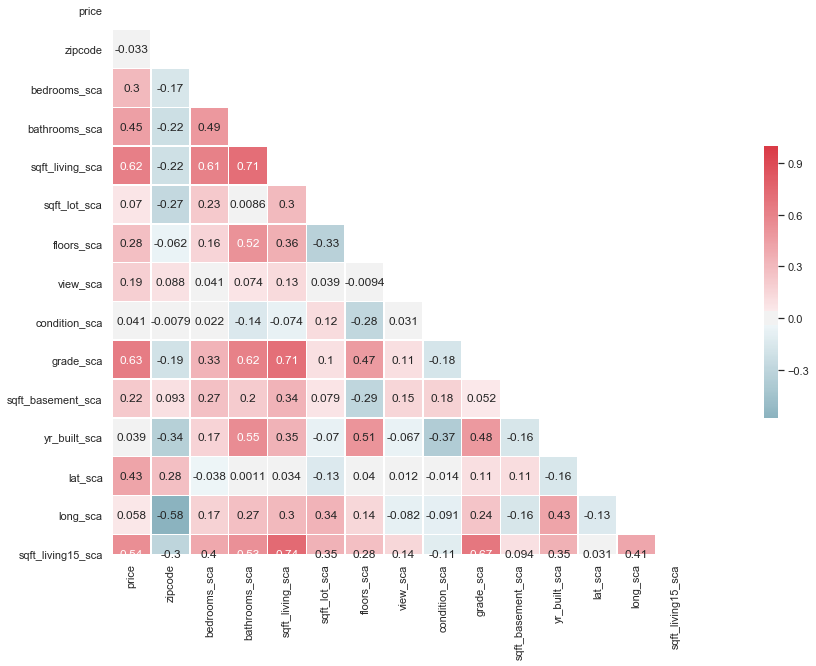

In [76]:
sns.set(style="white")
#Correlations are low - good thing?


# Compute the correlation matrix
corr = df_clean.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

# Recreate scatter plots to check for linearity with new (scaled) variables

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


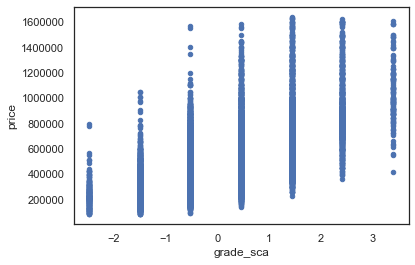

In [77]:
df_clean.plot("grade_sca","price", kind='scatter')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


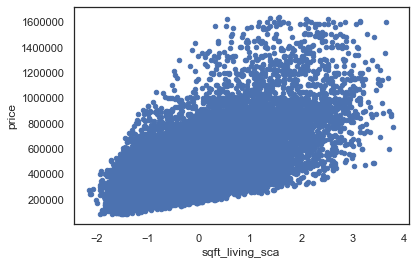

In [78]:
df_clean.plot("sqft_living_sca","price", kind='scatter')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


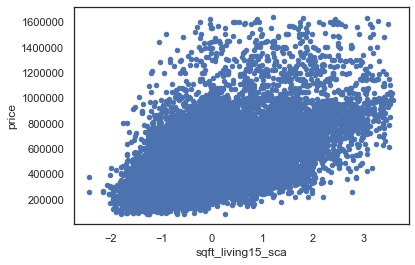

In [79]:
df_clean.plot("sqft_living15_sca","price", kind='scatter')

# Create updated qq plots

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                 1.299e+04
Date:                Fri, 06 Dec 2019   Prob (F-statistic):               0.00
Time:                        17:20:28   Log-Likelihood:            -2.6285e+05
No. Observations:               19425   AIC:                         5.257e+05
Df Residuals:                   19423   BIC:                         5.257e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.854e+05   1307.259    371.333      0.000    4.83e+05    4.88e+05
grade_sca    1.49e+05   1307.259    113.972      0.000    1.46e+05    1.52e+05
==============================================================================
Omnibus:                     3932.649   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9557.717
Skew:                           1.128   Prob(JB):                         0.00
Kurtosis:                       5.592   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

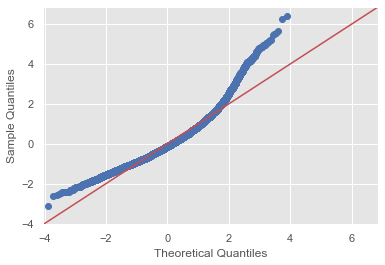

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                 1.224e+04
Date:                Fri, 06 Dec 2019   Prob (F-statistic):               0.00
Time:                        17:20:29   Log-Likelihood:            -2.6308e+05
No. Observations:               19425   AIC:                         5.262e+05
Df Residuals:                   19423   BIC:                         5.262e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.854e+05   1322.710    366.996      0.000    4.83e+05    4.88e+05
sqft_living_sca  1.463e+05   1322.710    110.620      0.000    1.44e+05    1.49e+05
==============================================================================
Omnibus:                     3403.470   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7601.632
Skew:                           1.017   Prob(JB):                         0.00
Kurtosis:                       5.293   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

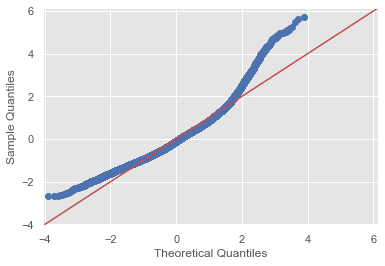

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     8061.
Date:                Fri, 06 Dec 2019   Prob (F-statistic):               0.00
Time:                        17:20:29   Log-Likelihood:            -2.6446e+05
No. Observations:               19425   AIC:                         5.289e+05
Df Residuals:                   19423   BIC:                         5.289e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          4.854e+05   1419.647    341.936      0.000    4.83e+05    4.88e+05
sqft_living15_sca  1.275e+05   1419.647     89.781      0.000    1.25e+05     1.3e+05
==============================================================================
Omnibus:                     4839.008   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13740.464
Skew:                           1.312   Prob(JB):                         0.00
Kurtosis:                       6.177   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

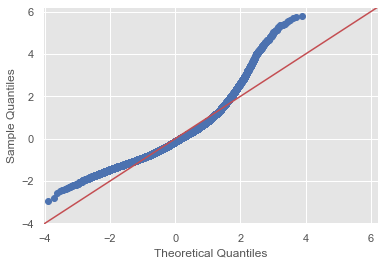

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
plt.style.use('ggplot')

f = 'price~grade_sca'
f2 = 'price~sqft_living_sca'
f3 = 'price~sqft_living15_sca'

model = smf.ols(formula=f, data=df_clean).fit()
model2 = smf.ols(formula=f2, data=df_clean).fit()
model3 = smf.ols(formula=f3, data=df_clean).fit()

resid1 = model.resid
resid2 = model2.resid
resid3 = model3.resid

display(model.summary())

fig = sm.graphics.qqplot(resid1, dist=stats.norm, line='45', fit=True)
plt.show()
display(model2.summary())
fig2 = sm.graphics.qqplot(resid2, dist=stats.norm, line='45', fit=True)
plt.show()
fig3 = sm.graphics.qqplot(resid3, dist=stats.norm, line='45', fit=True)
display(model3.summary())
plt.show()

# As the old saying in real estate goes, "Location, location, location!" - include zipcode in the model

Although zipcodes have numbers, they have no numerical significance in our data. Thus, this variable is treated as categorical. The code below represents this, and explains why no dummies or label encoding occurred for zipcode previously.

In [81]:
f = 'price~grade_sca+sqft_living_sca+sqft_living15_sca+C(zipcode)'

In [82]:
model = ols(formula=f, data=df_clean).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1155.
Date:                Fri, 06 Dec 2019   Prob (F-statistic):               0.00
Time:                        17:20:29   Log-Likelihood:            -2.5163e+05
No. Observations:               19425   AIC:                         5.034e+05
Df Residuals:                   19352   BIC:                         5.040e+05
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            3.008e+05   5464.615     55.043      0.000     2.9e+05    3.11e+05
C(zipcode)[T.98002]   2.77e+04   9149.338      3.027      0.002    9763.047    4.56e+04
C(zipcode)[T.98003]   568.6620   8290.855      0.069      0.945   -1.57e+04    1.68e+04
C(zipcode)[T.98004]  6.177e+05   8863.153     69.693      0.000       6e+05    6.35e+05
C(zipcode)[T.98005]  3.409e+05   1.01e+04     33.647      0.000    3.21e+05    3.61e+05
C(zipcode)[T.98006]  2.735e+05   7653.416     35.740      0.000    2.59e+05    2.89e+05
C(zipcode)[T.98007]  2.588e+05   1.04e+04     24.921      0.000    2.38e+05    2.79e+05
C(zipcode)[T.98008]  2.488e+05   8407.206     29.592      0.000    2.32e+05    2.65e+05
C(zipcode)[T.98010]  9.684e+04   1.28e+04      7.592      0.000    7.18e+04    1.22e+05
C(zipcode)[T.98011]  1.324e+05   9271.932     14.282      0.000    1.14e+05    1.51e+05
C(zipcode)[T.98014]  1.306e+05   1.34e+04      9.742      0.000    1.04e+05    1.57e+05
C(zipcode)[T.98019]  7.969e+04   9715.982      8.201      0.000    6.06e+04    9.87e+04
C(zipcode)[T.98022]  3.206e+04   9590.051      3.343      0.001    1.33e+04    5.09e+04
C(zipcode)[T.98023] -2.385e+04   7186.070     -3.320      0.001   -3.79e+04   -9768.925
C(zipcode)[T.98024]  1.591e+05   1.59e+04      9.998      0.000    1.28e+05     1.9e+05
C(zipcode)[T.98027]  1.893e+05   7747.684     24.437      0.000    1.74e+05    2.05e+05
C(zipcode)[T.98028]  1.264e+05   8286.519     15.255      0.000     1.1e+05    1.43e+05
C(zipcode)[T.98029]  2.127e+05   8029.902     26.491      0.000    1.97e+05    2.28e+05
C(zipcode)[T.98030] -2062.6877   8463.849     -0.244      0.807   -1.87e+04    1.45e+04
C(zipcode)[T.98031]  9841.6594   8305.785      1.185      0.236   -6438.399    2.61e+04
C(zipcode)[T.98032]  4437.7011   1.08e+04      0.412      0.680   -1.67e+04    2.55e+04
C(zipcode)[T.98033]  3.584e+05   7538.181     47.542      0.000    3.44e+05    3.73e+05
C(zipcode)[T.98034]  1.854e+05   7090.871     26.149      0.000    1.72e+05    1.99e+05
C(zipcode)[T.98038]  2.177e+04   7034.060      3.096      0.002    7987.355    3.56e+04
C(zipcode)[T.98039]  8.336e+05   2.55e+04     32.730      0.000    7.84e+05    8.84e+05
C(zipcode)[T.98040]  4.967e+05   9115.153     54.496      0.000    4.79e+05    5.15e+05
C(zipcode)[T.98042]  7178.3196   7061.869      1.016      0.309   -6663.555     2.1e+04
C(zipcode)[T.98045]  8.749e+04   3.29e+04      2.663      0.008    2.31e+04    1.52e+05
C(zipcode)[T.98052]  2.449e+05   7026.388     34.848      0.000    2.31e+05    2.59e+05
C(zipcode)[T.98053]  2.261e+05   7849.334     28.799      0.000    2.11e+05    2.41e+05
C(zipcode)[T.98055]  4.506e+04   8387.268      5.372      0.000    2.86e+04    6.15e+04
C(zipcode)[T.98056]  1.089e+05   7513.969     14.497      0.000    9.42e+04    1.24e+05
C(z

# Use model.params to display the coefficents for each variable

In [83]:
model.params
#Way to sort zipcode coffecients from high to low?

Intercept              300786.725098
C(zipcode)[T.98002]     27696.540770
C(zipcode)[T.98003]       568.662033
C(zipcode)[T.98004]    617698.066830
C(zipcode)[T.98005]    340872.954218
                           ...      
C(zipcode)[T.98198]     37021.947882
C(zipcode)[T.98199]    382206.668531
grade_sca               44567.125248
sqft_living_sca         90522.646431
sqft_living15_sca       22633.470556
Length: 73, dtype: float64

# Train-Test Split to validate the model

In [84]:
from sklearn.model_selection import train_test_split
X = df_clean.drop('price', axis=1)
y = df_clean['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [85]:
df_train = pd.DataFrame(X_train, columns = X.columns)
df_train['price'] = y_train
df_test = pd.DataFrame(X_test, columns = X.columns)
df_test['price'] = y_test

In [86]:
from sklearn.metrics import r2_score
y_hat_test = model.predict(df_test)
r2_score(y_test, y_hat_test)

0.8138381135737504

# CONCLUSIONS & RECOMMENDATIONS

After running the second model, we can confidently say that the variables zipcode, sqft_living, grade, and sqft_living15 are strong influencers on the value of homes in King County. According to this model, 81% of our results can be explained by the data from these variables. Depending on your zipcode, it can be the largest influence on your home value, the smallest, or be somewhere in the middle. In othert words, location matters - a lot. The next biggest influencer is sqft_living. If you have plenty of square footage inside of the home, the value of the home will increase. Third, is grade. Having a solid grade by the King County Grading System will provide your home with increased value. And lastly, is sqft_living15. This one is pretty easy - if your neighbors have lots of square footage inside their homes, the value of your home will increase.

So, to maximize the value of your home, do the following:

1.)Make sure your home is in affluent zipcodes

2.)Make sure the home has lots of interior square footage

3.)Create the home using high-quality materials so that it is graded well by the King County Grading System

4.)Choose lands/lots where the nearest 15 neighbors have a large amount of interior square footage.